**Langkah 1: Menyusun Data Siswa**

Menyiapkan dataset transaksi yang berisi kombinasi produk yang dibeli. Library yang diperlukan diimpor untuk analisis dan visualisasi data. Terakhir, ambang dukungan minimum ditetapkan untuk evaluasi asosiasi item dalam transaksi.

In [11]:
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import networkx as nx

# Membuat Dataset
transactions = {
    'T1': ['Apel', 'Jeruk', 'Roti'],
    'T2': ['Apel', 'Roti', 'Mentega'],
    'T3': ['Jeruk', 'Mentega', 'Telur'],
    'T4': ['Apel', 'Telur', 'Susu'],
    'T5': ['Jeruk', 'Roti', 'Susu', 'Telur']
}

# Tetapkan Treshold minimum (0.4)
min_support = 0.4
num_transactions = len(transactions)

print(*[f"{key}: {', '.join(value)}" for key, value in transactions.items()], sep='\n')

T1: Apel, Jeruk, Roti
T2: Apel, Roti, Mentega
T3: Jeruk, Mentega, Telur
T4: Apel, Telur, Susu
T5: Jeruk, Roti, Susu, Telur


**Langkah 2: Menghitung Support**

Menghitung dukungan item individu dan pasangan item dalam transaksi. Hasilnya difilter berdasarkan ambang dukungan minimum yang ditetapkan.

In [12]:
# Hitung Dukungan Individu dan Pasangan dalam Transaksi
item_support = {}
pair_support = {}

# Menghitung Dukungan Individu
for items in transactions.values():
    for item in items:
        item_support[item] = item_support.get(item, 0) + 1

# Menghitung Dukungan Pasangan
for items in transactions.values():
    for pair in combinations(items, 2):
        pair = tuple(sorted(pair))
        pair_support[pair] = pair_support.get(pair, 0) + 1

# Filter berdasarkan Treshold Minimum
item_support = {k: v / num_transactions for k, v in item_support.items() if v / num_transactions >= min_support}
pair_support = {k: v / num_transactions for k, v in pair_support.items() if v / num_transactions >= min_support}

print("Item Support:", item_support)
print("Pair Support:", pair_support)

Item Support: {'Apel': 0.6, 'Jeruk': 0.6, 'Roti': 0.6, 'Mentega': 0.4, 'Telur': 0.6, 'Susu': 0.4}
Pair Support: {('Apel', 'Roti'): 0.4, ('Jeruk', 'Roti'): 0.4, ('Jeruk', 'Telur'): 0.4, ('Susu', 'Telur'): 0.4}


**Langkah 3: Visualisasi**

Memvisualisasikan asosiasi item yang memenuhi ambang dukungan minimum dalam bentuk graf. Simpul ditambahkan untuk item, dan tepi untuk pasangan item, kemudian digambar dengan ukuran dan ketebalan sesuai dukungan mereka

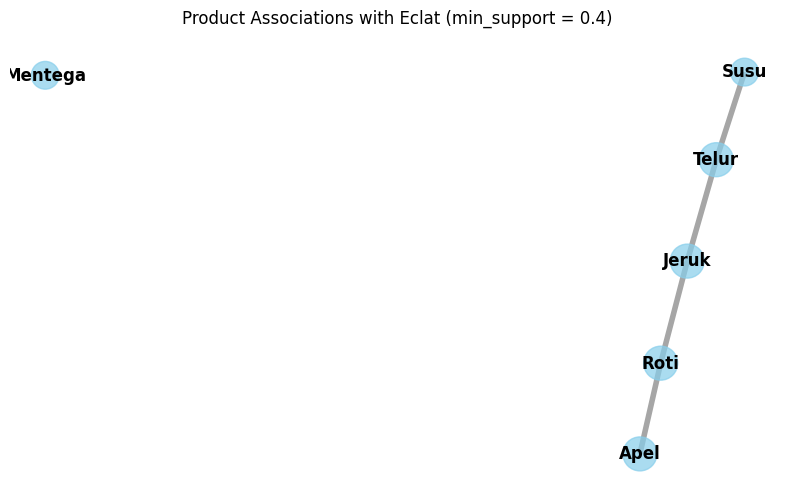

In [13]:
# Visualisasi menggunakan Graph
G = nx.Graph()

# Tambahkan Titik untuk setiap Items
for item in item_support.keys():
    G.add_node(item, size=item_support[item] * 1000)

# Tambahkan Garis unutk Pasangan yang berada di atas Treshold
for (item1, item2), support in pair_support.items():
    G.add_edge(item1, item2, weight=support * 10)

# Gambar Graph
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(G, pos, node_size=[v * 1000 for v in item_support.values()], node_color="skyblue", alpha=0.7)
nx.draw_networkx_edges(G, pos, width=[d['weight'] for u, v, d in G.edges(data=True)], edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")
plt.title("Product Associations with Eclat (min_support = 0.4)")
plt.axis('off')
plt.show()